<hr style="height:2px; background-color: black;">
<div style="text-align: left; display: inline-block; width: 50%;">Vincent Earl Andrews</div><div style="text-align: right; display: inline-block; width: 50%;"></div>                                           
                                                  
<h3 align="center">Cosmology Project 1: Hubble Law</h3>
<hr style="height:2px; background-color: black;">

In [2]:
# general use 
import pandas as pd
import numpy as np
import math

# plotting / visualization
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

# getting data from NED astrophysical database
from astroquery.ipac.ned import Ned

# packages for fitting
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

Importing Hubble data from a csv file for the 24 sources in Hubble's original paper. Data is copied from NED for the heliocnetric and CMB velocities, as well as the mean distance.

In [3]:
# create a dataframe of targets originally from the Hubble paper
Hubble_targets_df = pd.read_csv("C:/Users/vince/Downloads/Hubble_data3 - Sheet1.csv")
Hubble_objects = Hubble_targets_df["Object Name"].tolist()

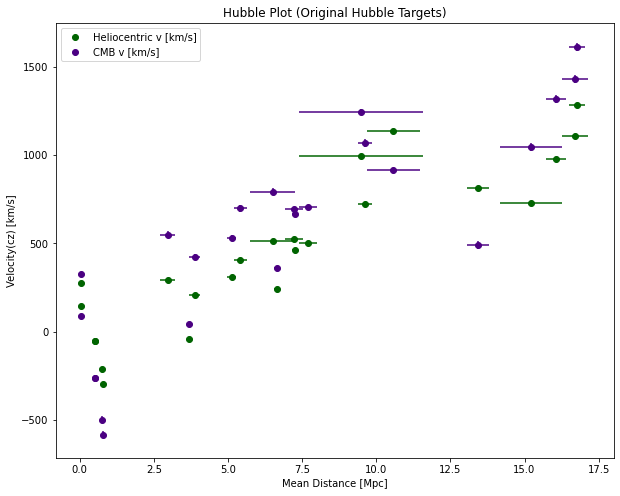

In [8]:
# try plotting Hubble data
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
# define x/y and errors from df
mean_distance = np.array(Hubble_targets_df["d [Mpc]"])
mean_distance_err = Hubble_targets_df["d_err [Mpc]"].tolist()

# getting heliocentric and CMB velocities
cz_helio = Hubble_targets_df["v(Helio) [km/s]"].tolist()
cz_helio_err = Hubble_targets_df["v_err(Helio) [km/s]"].tolist()

cz_CMB = Hubble_targets_df["v(CMB) [km/s]"].tolist()
cz_CMB_err = Hubble_targets_df["v_err(CMB) [km/s]"].tolist()

# create scatter plot and add errors
ax.set_title("Hubble Plot (Original Hubble Targets)")
ax.scatter(mean_distance, cz_helio, color = 'darkgreen', label = 'Heliocentric v [km/s]')
ax.scatter(mean_distance, cz_CMB, color = 'indigo', label = 'CMB v [km/s]')
ax.set_xlabel("Mean Distance [Mpc]")
ax.set_ylabel("Velocity(cz) [km/s]")

# add error bars
ax.errorbar(mean_distance, cz_helio, xerr = mean_distance_err, yerr = cz_helio_err, color = 'darkgreen', linestyle = '')
ax.errorbar(mean_distance, cz_CMB, xerr = mean_distance_err, yerr = cz_CMB_err, color = 'indigo', linestyle = '')
ax.legend()

Method 1: Perform Ordinary Least Squares (OLS) Regression - this is the most basic line fitting model that can give an idea of what might need to be adjusted in the methodology used.

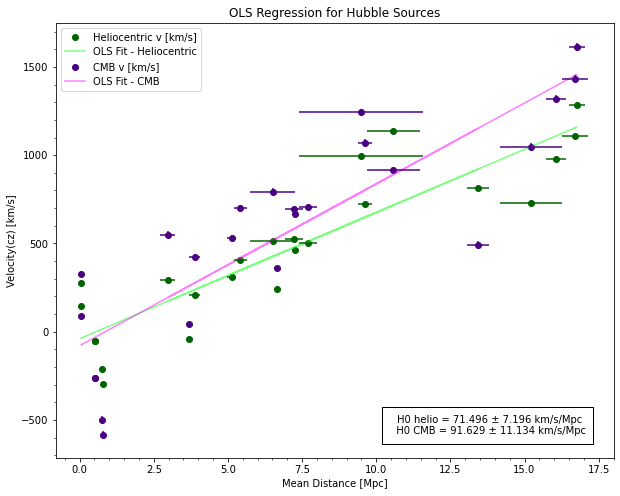

In [57]:
# Fit OLS (ordinary least squares) model
ols_helio = LinearRegression()
ols_CMB = LinearRegression()

# fit for heliocentric
ols_helio.fit(mean_distance.reshape(-1,1), cz_helio)
pred_ols_helio = ols_helio.predict(mean_distance.reshape(-1,1))

# fit for CMB
ols_CMB.fit(mean_distance.reshape(-1,1), cz_CMB)
pred_ols_CMB = ols_CMB.predict(mean_distance.reshape(-1,1))

# plot OLS results
fig, ax = plt.subplots()
fig.set_size_inches(10,8)

ax.scatter(mean_distance, cz_helio, color = 'darkgreen', label = 'Heliocentric v [km/s]')
ax.plot(mean_distance, pred_ols_helio, color = 'lime', label = 'OLS Fit - Heliocentric', alpha = 0.5)

ax.scatter(mean_distance, cz_CMB, color = 'indigo', label = 'CMB v [km/s]')
ax.plot(mean_distance, pred_ols_CMB, color = 'magenta', label = 'OLS Fit - CMB', alpha = 0.5)

ax.set_title("OLS Regression for Hubble Sources")
ax.set_xlabel("Mean Distance [Mpc]")
ax.set_ylabel("Velocity(cz) [km/s]")

# add error bars
ax.errorbar(mean_distance, cz_helio, xerr = mean_distance_err, yerr = cz_helio_err, color = 'darkgreen', linestyle = '')
ax.errorbar(mean_distance, cz_CMB, xerr = mean_distance_err, yerr = cz_CMB_err, color = 'indigo', linestyle = '')
ax.legend()
ax.minorticks_on()

# get slope results for hubble constant
H0_ols_helio = ols_helio.coef_[0]
H0_ols_CMB = ols_CMB.coef_[0]

# function for computing standard error of regression slope
def standard_err(x, y, y_pred):
    '''
    x: is the mean_distance in Mpc
    y: is the heliocentric velocity (cz) in km/s
    y_pred: is the predicted values for y from the ols model 
    '''
    # get residual in y 
    residuals = y - y_pred

    # Residual variance (standard error of regression)
    n = len(x)
    s = np.sqrt(np.sum(residuals**2)/(n))

    # Standard error of slope
    x_mean = np.mean(x)
    error = s / np.sqrt(np.sum((x.flatten() - x_mean) ** 2))
    
    return error

# get standard error
slope_err_helio = standard_err(mean_distance, cz_helio, pred_ols_helio)
slope_err_CMB = standard_err(mean_distance, cz_CMB, pred_ols_CMB)

# _ = hides output in jupyter notebook
_ = ax.text(0.95, 0.05, 
f"H0 helio = {H0_ols_helio:.3f} ± {slope_err_helio:.3f} km/s/Mpc \n  H0 CMB = {H0_ols_CMB:.3f} ± {slope_err_CMB:.3f} km/s/Mpc",
            transform=ax.transAxes,
            ha="right", va="bottom",
            bbox=dict(boxstyle="square,pad=0.75", facecolor="white", edgecolor="black"))

In [16]:
print("The Hubble constant using Ordinary Least Squares is:",H0_ols_helio, "km/s/Mpc")
print("The error in the ols model is:", slope_err_helio)

print("The Hubble constant using Ordinary Least Squares is:",H0_ols_CMB, "km/s/Mpc")
print("The error in the ols model is:", slope_err_CMB)

The Hubble constant using Ordinary Least Squares is: 71.49610385274562 km/s/Mpc
The error in the ols model is: 7.195654949016221
The Hubble constant using Ordinary Least Squares is: 91.62931918818367 km/s/Mpc
The error in the ols model is: 11.134238377531023


Method 2: Robust Regression with M-Estimators: M-Estimators can be used to reduce the influence of outliers in a dataset. Since we see some targets far off from the fit that also have large errors, M-Estimators might help get a more accurate calculation. 

Slope for heliocentric = 66.927 ± 4.488
Slope for CMB = 86.161 ± 7.065


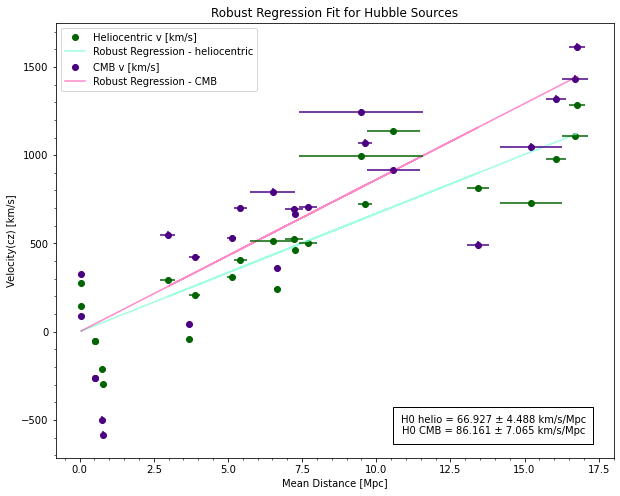

In [51]:
# regression models usually only give slope - adding constant gives  intercept
d = sm.add_constant(mean_distance)

# calling Robust regression
rr_helio = sm.RLM(cz_helio, mean_distance, M=sm.robust.norms.HuberT()).fit()
rr_CMB = sm.RLM(cz_CMB, mean_distance, M=sm.robust.norms.HuberT()).fit()

# visualizing robust regression results
fig, ax = plt.subplots()
fig.set_size_inches(10,8)

ax.scatter(mean_distance, cz_helio, color = 'darkgreen', label = 'Heliocentric v [km/s]')
ax.plot(mean_distance, rr_helio.predict(mean_distance), color = 'aquamarine', label = 'Robust Regression - heliocentric', alpha = 0.75)

ax.scatter(mean_distance, cz_CMB, color = 'indigo', label = 'CMB v [km/s]')
ax.plot(mean_distance, rr_CMB.predict(mean_distance), color = 'deeppink', label = 'Robust Regression - CMB', alpha = 0.5)

ax.set_title("Robust Regression Fit for Hubble Sources")
ax.set_xlabel("Mean Distance [Mpc]")
ax.set_ylabel("Velocity(cz) [km/s]")

# add error bars
ax.errorbar(mean_distance, cz_helio, xerr = mean_distance_err, yerr = cz_helio_err, color = 'darkgreen', linestyle = '')
ax.errorbar(mean_distance, cz_CMB, xerr = mean_distance_err, yerr = cz_CMB_err, color = 'indigo', linestyle = '')
ax.legend()
ax.minorticks_on()

# get Hubble Constant
print(f"Slope for heliocentric = {rr_helio.params[0]:.3f} ± {rr_helio.bse[0]:.3f}")
print(f"Slope for CMB = {rr_CMB.params[0]:.3f} ± {rr_CMB.bse[0]:.3f}")

# _ = hides output in jupyter notebook
_ = ax.text(0.95, 0.05, 
f"H0 helio = {rr_helio.params[0]:.3f} ± {rr_helio.bse[0]:.3f} km/s/Mpc\nH0 CMB = {rr_CMB.params[0]:.3f} ± {rr_CMB.bse[0]:.3f} km/s/Mpc",
            transform=ax.transAxes,
            ha="right", va="bottom",
            bbox=dict(boxstyle="square,pad=0.75", facecolor="white", edgecolor="black")
)